# 확률 - 확률 분포

## 1. Scipy 패키지 

- 사이파이(SciPy)는 수치해석기능을 제공하는 파이썬 패키지 
- 확률분포 분석을 위한 기능 제공 

###  확률 분포 클래스 

| 종류 | 명령 | 확률분포 |
|-|-|-|
| 이산 | `bernoulli` | 베르누이분포 |
| 이산 | `binom` |  이항분포 |
| 이산 | `multinomial` |  다항분포 |
| 연속 | `uniform` | 균일분포 |
| 연속 | `norm` | 정규분포 |
| 연속 | `beta` | 베타분포 |
| 연속 | `gamma` | 감마분포 |
| 연속 | `t` | 스튜던트 t분포 |
| 연속 | `chi2` | 카이 제곱분포 |
| 연속 | `f` | F분포 |
| 연속 | `dirichlet` | 디리클리분포 |
| 연속 | `multivariate_normal` | 다변수 정규분포 |

### 확률 분포 매소드 

| 메서드 | 기능 |
|-|-|
| `pmf` | 확률질량함수(probability mass function) |
| `pdf` | 확률밀도함수(probability density function) |
| `cdf` | 누적분포함수(cumulative distribution function)  |
| `ppf` | 누적분포함수의 역함수(inverse cumulative distribution function)  |
| `sf` | 생존함수(survival function) = 1 - 누적분포함수  |
| `isf` | 생존함수의 역함수(inverse survival function)  |
| `rvs` | 랜덤 표본 생성(random variable sampling)    |

In [1]:
# 패키지 임포트 
import os 
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning) 

import pandas as pd # pandas package
import numpy as np  # numpy package  
from scipy import stats  # Scipy Package 

# 시각화 패키지 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

## 2. 이산확률분포

### 1) 베르누이분포
- 확률론과 통계학에서 매 시행마다 오직 두 가지의 가능한 결과만 일어난다고 할 때, 
- 이러한 실험을 1회 시행하여 일어난 두 가지 결과에 의해 그 값이 각각 0과 1로 결정되는 확률분포
#### stats.bernoulli() : 베르누이 확률 변수 클래스 

In [3]:
# 베르누이 분포 정의 
mu = 0.7
bern = stats.bernoulli(mu)

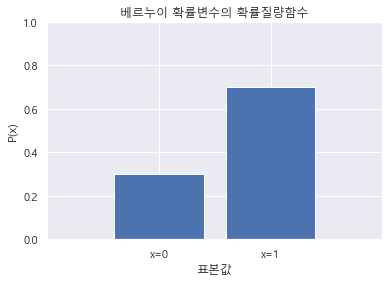

In [4]:
## 확률질량함수 계산 및 시각화  
b_x = [0, 1]
bern_pmf = bern.pmf(b_x)

# 시각화 
plt.bar(b_x, bern_pmf)
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

In [5]:
# 베르누이 검정을 위한 베르누이 샘플 100개 생성 
x_sample_bern = bern.rvs(100, random_state=0)

In [7]:
x_sample_bern

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [8]:
# 베르누이 시뮬레이션 
y_bern = np.bincount(x_sample_bern, minlength=2) / float(len(x_sample_bern))

df_bern = pd.DataFrame({"결과": bern_pmf, "검증(시뮬레이션)": y_bern})
df_bern.index = [0, 1]
df_bern

,결과,검증(시뮬레이션)
0,0.3,0.23
1,0.7,0.77


### 2) 이항분포
-  '성공’에 해당하는 사상이 출현할 확률이 𝑝인 똑같은 베르누이 시행을 독립적으로 
-  𝑛번 반복해서 시행하여 일어난 두 가지 결과에 의해 그 값이 각각 0과 1로 결정되는 확률분포 
#### stats.binom.pmf(성공횟수, n='실험 횟수', p='성공확률') 

In [35]:
## scipy 이항분포 확률질량함수 계산 

# 0.3의 확률을 갖는 15회의 실험에서 3회 성공할 확률 반환 
print("k=3,n=15,p=0.3의 PMF:",stats.binom.pmf(3, n=15, p=0.3))  

# 0.3의 확률을 갖는 15회의 실험에서 0 ~ 3회 성공할 확률의 누적값 반환 
print("k=0~3,n=15,p=0.3의 PMF:", stats.binom.cdf(4, n=15, p=0.3))

k=3,n=15,p=0.3의 PMF: 0.17004021326428564
k=0~3,n=15,p=0.3의 PMF: 0.5154910592268429


In [ ]:
## scipy 이항분포 확률질량함수 계산 

# 0.3의 확률을 갖는 15회의 실험에서 k회 성공할 확률 반환 
# print(stats.binom.pmf(3, n=15, p=0.3))  

# print(stats.binom.pmf(0, n=15, p=0.3)) 
# print(stats.binom.pmf(1, n=15, p=0.3)) 
# print(stats.binom.pmf(2, n=15, p=0.3)) 
# print(stats.binom.pmf(3, n=15, p=0.3))

# cdf_cal = stats.binom.pmf(0, n=15, p=0.3) + stats.binom.pmf(1, n=15, p=0.3) + stats.binom.pmf(2, n=15, p=0.3) + stats.binom.pmf(3, n=15, p=0.3)+ stats.binom.pmf(4, n=15, p=0.3)

# print(cdf_cal)
# print(stats.binom.cdf(4, n=15, p=0.3))

In [16]:
#  p의 확률을 갖는 n회의 시행에서 k회 성공할 (일어날) 확률을 반환하는 함수 생성 
def bion_dist(k, n, p):
    pmf_bion = stats.binom.pmf(k, n = n, p = p)
    return pmf_bion

In [43]:
# np.arange(0,16)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [54]:
# for k in range(0,16) :
#      print(k)

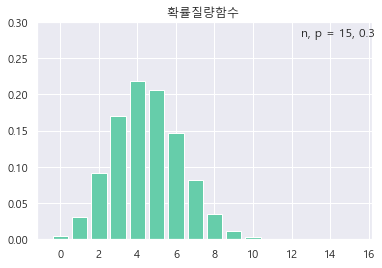

In [38]:
# 0~15 범위 생성 : 성공 횟수 
x = np.arange(0,16)

# 확률 질량 함수의 값 array
pdf_result = [bion_dist(k, 15, 0.3) for k in range(0,16)]

# 시각화 
plt.title("확률질량함수 ")
plt.ylim(0, 0.3)
plt.text(12.5, 0.28, 'n, p = 15, 0.3')
plt.bar(x, pdf_result, color='mediumaquamarine')
# plt.plot(x, pdf_result, color='lightcoral')
plt.show()

### 3) 포아송 분포 
- 어떤 단위시간 동안 발생한 사건 횟수를 x라 했을 때 확률분포 
####  stats.poisson.pmf(n = '시행수', lamb ='평균 발생 수:기대값')  
  - n회의 사건이 일어날 확률을 반환

In [65]:
# scipy 포아송 함수 
# 3번의 시행에서 평균 사건 수(기대값 2)에 대한 발생확률
stats.poisson.pmf(3, 2, loc=0)

0.18044704431548356

In [60]:
# n번의 시행에서 평균 사건 수(기대값,람다)에 대한 발생확률 함수 
def pois_dist(n, lamb):
    pmf_poi = stats.poisson.pmf(n, lamb, loc=0)
    return pmf_poi

In [61]:
# 확률 질량 함수의 값 array
x = np.arange(0, 41)
poi_pdf_result = [pois_dist(n, 10) for n in range(0,41)]

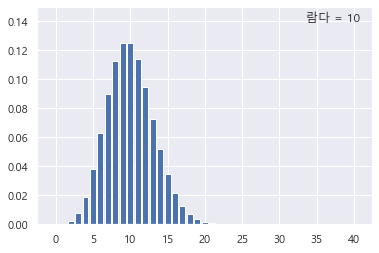

In [62]:
plt.ylim(0, 0.15)
plt.text(33.5, 0.14, '람다 = 10')
plt.bar(x, poi_pdf_result)
plt.show()

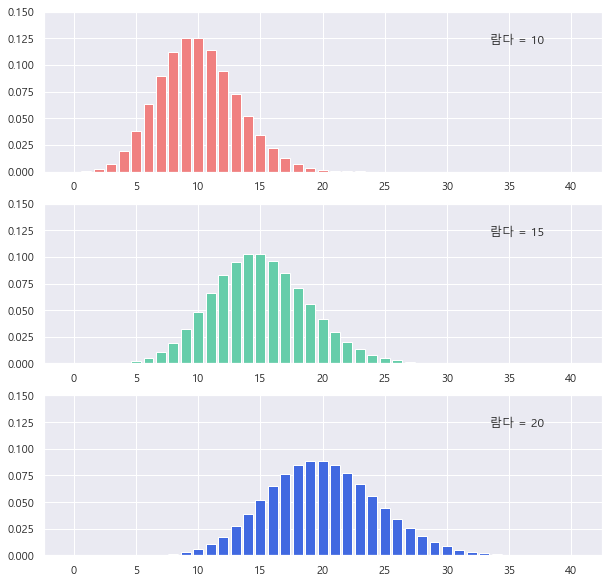

In [64]:
## 기대값에 따른 포아송 분포 차이 확인

x = np.arange(0,41)

fig = plt.figure(figsize = (10,10))

fig.add_subplot(3,1,1)
pmf_poin1 = np.array([pois_dist(n, 10) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다 = 10')
plt.bar(x, pmf_poin1, color='lightcoral')

fig.add_subplot(3,1,2)
pmf_poin2 = np.array([pois_dist(n, 15) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다 = 15')
plt.bar(x, pmf_poin2, color='mediumaquamarine')

fig.add_subplot(3,1,3)
pmf_poin3 = np.array([pois_dist(n, 20) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다 = 20')
plt.bar(x, pmf_poin3, color='royalblue')

plt.show()

## 3. 연속확률분포

### 1) 정규분포 
-  평균을 중심으로 좌우대칭이고 종모양을 갖는 확률분포(=가우스 분포, Gaussian distribution)
####  stats.norm(loc = '기대값', scale = '표준편차)  

In [76]:
## 기댓값이 70이고 표준 편차가 10인 정규분포 생성
norm = stats.norm(loc=70, scale=10)

In [79]:
## 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150 까지 2000개 생성 
s_x = np.linspace(-10, 150, 2000)

## 확률 밀도함수 
s_pdf = norm.pdf(s_x)

In [70]:
# s_x

array([-10.        ,  -9.91995998,  -9.83991996, ..., 149.83991996,
       149.91995998, 150.        ])

In [82]:
# s_pdf

array([5.05227108e-16, 5.38618771e-16, 5.74180583e-16, ...,
       5.74180583e-16, 5.38618771e-16, 5.05227108e-16])

In [80]:
## 확률 밀도함수계산 
# mu = 70
# sigma = 10
# s_pdf_cal = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(s_x-mu)**2 / (2 * sigma**2))

In [81]:
# s_pdf_cal

array([5.05227108e-16, 5.38618771e-16, 5.74180583e-16, ...,
       5.74180583e-16, 5.38618771e-16, 5.05227108e-16])

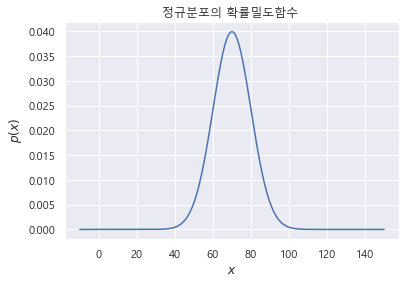

In [72]:
# 정규 분포 시각화 
plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [73]:
## 누적분포함수 
s_cdf = norm.cdf(s_x)

## 누적분포함수 계산 
# from scipy.special import erf
# s_cdf_cal = 0.5 * (1 + erf((s_x-mu)/(np.sqrt(2 * sigma**2))))

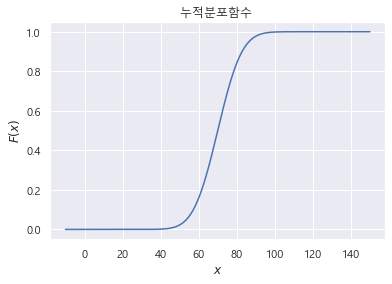

In [75]:
## 누적분포함수 시각화 
plt.plot(s_x, s_cdf)
plt.title("누적분포함수 ")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

### 2) 표준정규분포  
- 표준화확률변수 𝑍에 의해 변환과정을 거쳐 평균이 0이고, 표준편차가 1로 정리된 정규분포
####  stats.norm(loc = 0, scale = 1)  

In [85]:
##기댓값이 0이고 표준 편차가 11인 정규분포 
stan_norm = stats.norm(loc=0, scale=1)
# 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150 까지 2000개 생성 
sn_x = np.linspace(-5, 5, 1000)

# 확률 밀도함수 
sn_pdf = stan_norm.pdf(sn_x)

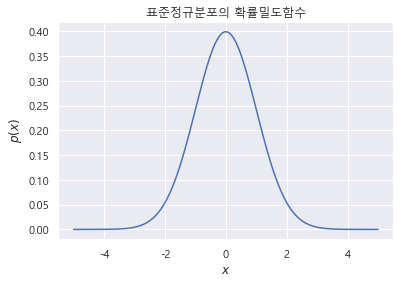

In [86]:
# 정규 분포 시각화 
plt.plot(sn_x, sn_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 3) 표준화   
-  정규분포를 평균이 0이고, 표준편차가 1인 표준정규분포로 정리하는 과정 
####  stats.norm(loc = 0, scale = 1)  

In [99]:
## 랜덤 데이터 생성 
n_data = np.random.randint(1, 100, size = 1000)
n_data = np.sort(n_data)

In [100]:
n_data.shape

(1000,)

In [101]:
## n_data의 평균과 표준편차 계산 
n_mean = np.mean(n_data)
print('mean:', np.mean(n_data))

n_std = np.std(n_data)
print('standard deviation:', np.std(n_data))

mean: 48.845
standard deviation: 27.557122037687463


In [102]:
## 확률 밀도함수 
norm_n_data = stats.norm(loc = n_mean, scale = n_std)

n_pdf = norm_n_data.pdf(n_data)

In [103]:
n_pdf.shape

(1000,)

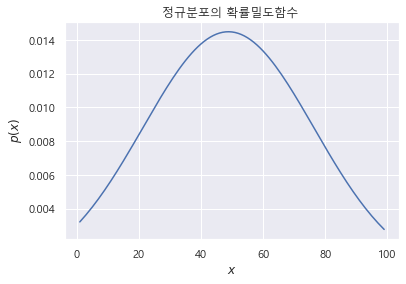

In [104]:
## 정규 분포 시각화 

plt.plot(n_data, n_pdf)
plt.title("정규분포의 확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [94]:
## 표준화 수행 
z_data = list(n_data)
z_data_list = [] 

for i in z_data:
    z = (i - n_mean) / n_std 
    z_data_list.append(z) 

In [108]:
## 표준정규분포 확률 밀도함수 
norm_z_data = stats.norm(loc = 0, scale = 1)
z_pdf = norm_z_data.pdf(z_data_list)

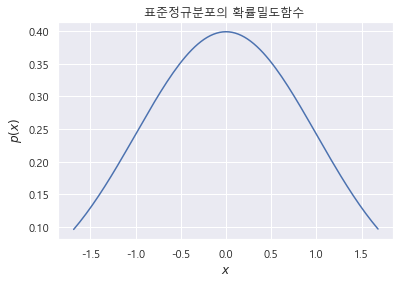

In [109]:
# 표준정규분포 시각화 

plt.plot(z_data_list, z_pdf)
plt.title("표준정규분포의 확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

## 4) 카이제곱분포 
- 모두 데이터가 흩어진 정도, 즉 치우침을 나타내는 분산의 특징을 이용해 한 집단의 (표본)분산을 추론하는 분포
- 범주형 변수인 명목척도나 서열척도 자료의 독립성 검정, 적합성 검정, 동질성 검정에 주로 활용 
#### chisquare() : 카이제곱검정의 검정통계량과 유의확률을 계산, 적합도 검정 /  chi2() : 카이 제곱분포

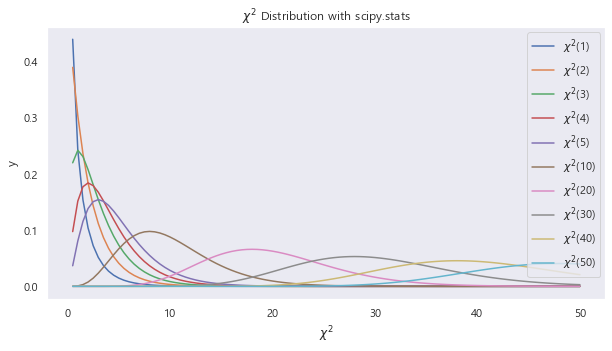

In [114]:
## 카이제곱 분포 표현 
from scipy.stats import chi2

## 라인스페이스 x축 설정 
Chi_X = np.linspace(0.5, 50, 100)

# 자유도에 따른 카이제곱 분포 시각화
plt.figure(figsize=(10, 5))          # 플롯 사이즈 지정
for dof in [1,2,3,4,5,10,20,30,40,50] :  
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X),
             label=r'$\chi^2$(' + str(dof) + ')')

plt.xlabel(r'$\chi^2$')              # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title(r'$\chi^2$ Distribution with scipy.stats')  
plt.legend()                         # 범례 표시
plt.show()                           # 플롯 

In [115]:
### 카이제곱 분포를 이용한 적합성 검정 
## 한 개의 '판매지역' 명목 변수에 값 확인 결과 서울, 인천, 대구 지역에서 판매 
## 교차분석표 생성(자유도 2)

# 관찰도수
x_o = [324, 78, 261]
# 기대도수
x_e = [371, 80, 212]

# 지역별 A제품의 판매수 
x_crosstab = pd.DataFrame([x_o, x_e], 
                          columns = ['서울','인천','대구'],
                          index = ['관찰도수', '기대도수'])

In [116]:
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [117]:
## 카이제곱 통계량 계산
from scipy.stats import chisquare

result = chisquare(x_o, f_exp = x_e)
result

# p-value가 0.0001725로 유의수준 0.05보다 작으므로
# 귀무가설을 기각하고, 
# 대립가설을 지지한다. 
# 즉, 관찰빈도와 기대빈도는 다르다.

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

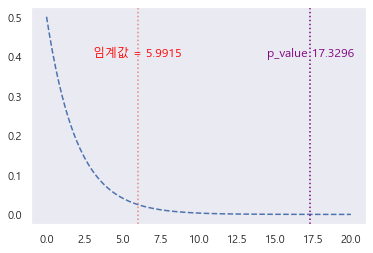

In [118]:
##  위 사례의 카이제곱분포 시각화
from scipy.stats import chi2 

dof = 2 # 자유도
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)

# 유의수준 : 5% 
x95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l, pdf_chi, 'b--')

# 95%의 임계값 표시 
plt.axvline(x=x95_c, color='lightcoral', linestyle=':')
plt.text(x95_c, .4, '임계값 = ' + str(round(x95_c, 4)),
        horizontalalignment='center',color='red')

# 위에서 구한 카이분포통계값 = result[0]
plt.axvline(x=result[0], color='purple', linestyle=':')
plt.text(result[0], .4, 'p_value '+ str(round(result[0], 4)),
         horizontalalignment='center', color='purple')
plt.grid()
plt.show()